## CS 4372.001 Computational Methods
## #Homework #3


### Students:
Scott Vu - SMV210000

Philip Wallis - PTW190000

#### Data we are using: Dog Breed Dataset
https://www.kaggle.com/c/dog-breed-identification

In [ ]:
# pip install statements
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install cv2
%pip install sklearn
%pip install tensorflow

In [3]:
# Ignore Python warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# imports here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Read Data

In [41]:
"""
Dog Breed Dataset: https://www.kaggle.com/c/dog-breed-identification
Publicly Stored at: https://personal.utdallas.edu/~smv210000/Heart%20Disease%20Dataset/heart.csv
"""

# Read in the data
data = pd.read_csv(
    "https://personal.utdallas.edu/~smv210000/Dog%20Breed/labels.csv",
    sep=",",
    header=0,
    encoding="unicode_escape",
)

test = "https://personal.utdallas.edu/~smv210000/Dog%20Breed/test/"
train = "https://personal.utdallas.edu/~smv210000/Dog%20Breed/train/"

In [9]:
# Run this to get the data
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


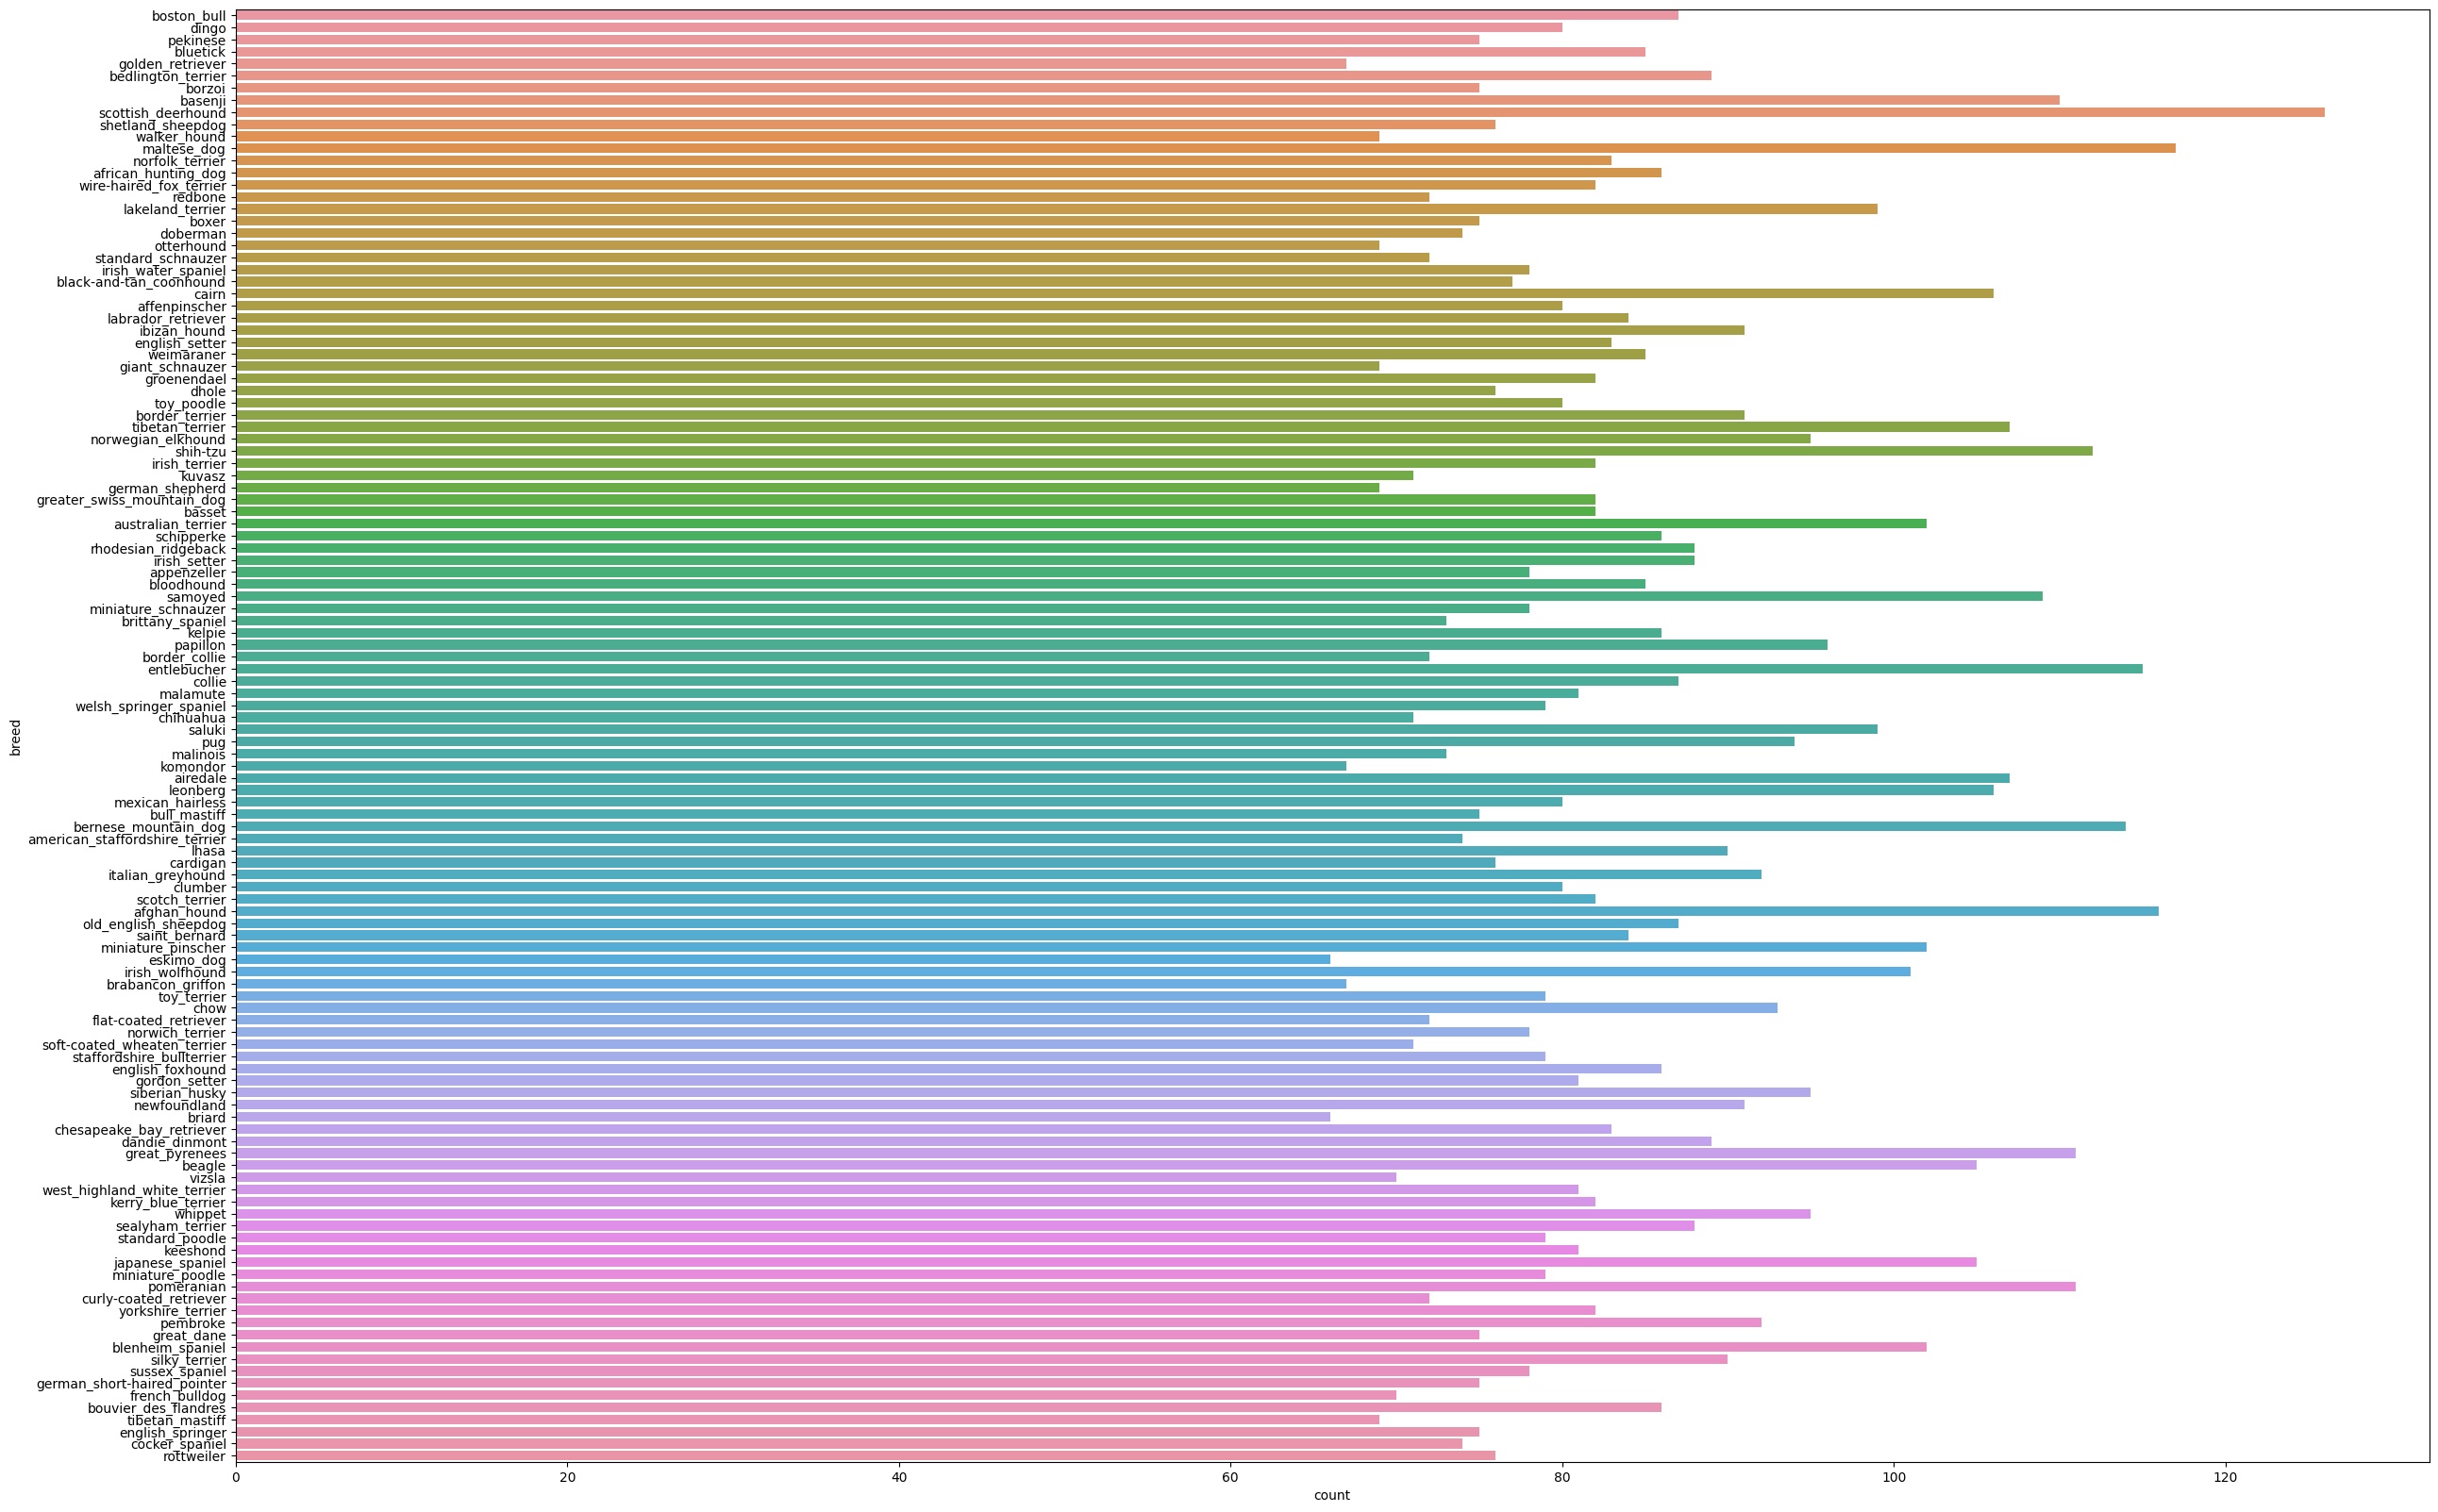

In [12]:
# Print breeds
plt.figure(figsize=(30,20))
sns.countplot(y="breed",data=data)
plt.show()

## Visualize Train Data

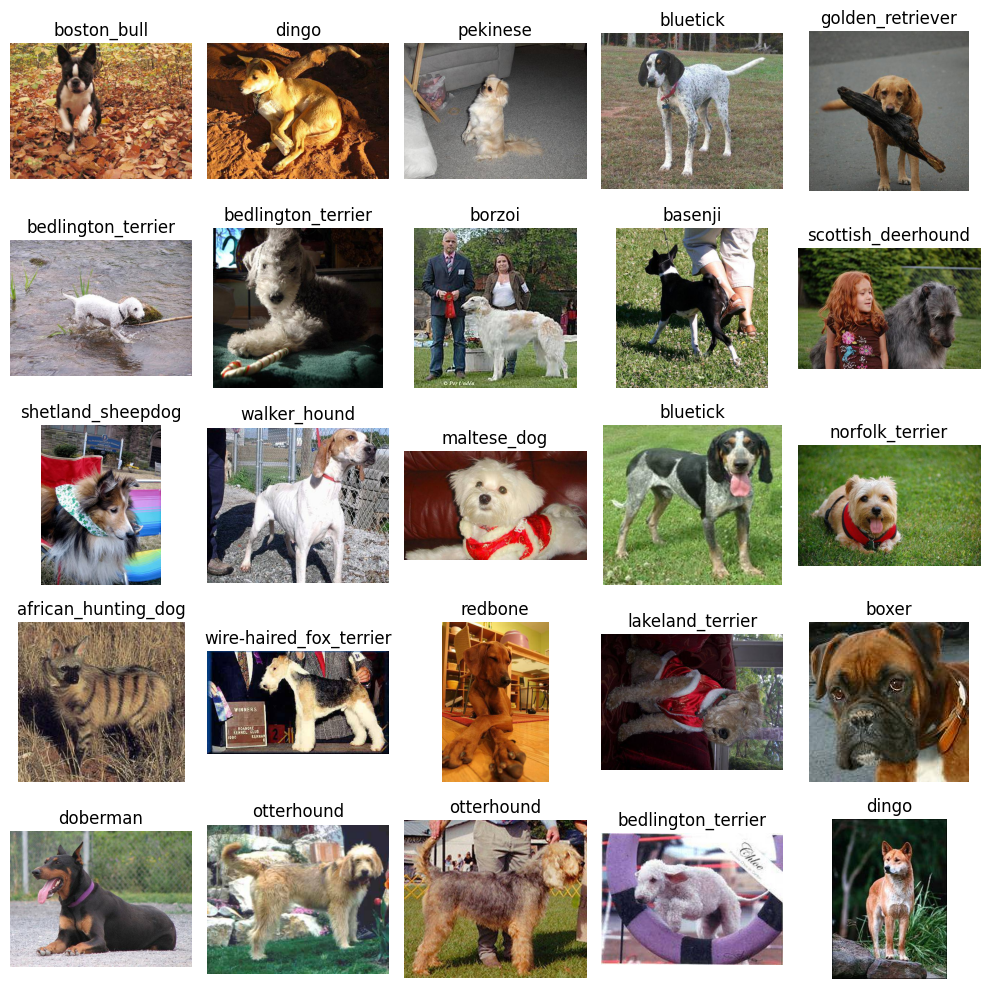

In [16]:
nrow=5
ncol=5
fig,ax=plt.subplots(nrow,ncol,figsize=(10,10))
for i,(img_id,breed) in enumerate(data[["id","breed"]].values[: nrow*ncol]):
    image_path=os.path.join(train,img_id+".jpg")
    image=cv2.imread(image_path)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    row=i//ncol
    col=i%ncol
    ax[row,col].imshow(image)
    ax[row,col].set_title(breed)
    ax[row,col].axis("off")
    
plt.tight_layout()
plt.show()

In [18]:
print("Total number of unique Dog Breeds :",len(data.breed.unique()))

Total number of unique Dog Breeds : 120


In [19]:
from sklearn.preprocessing import LabelEncoder
num_breed = 120
image_size = 200
batch_size = 32
encoder = LabelEncoder()

In [44]:
breed=list(data["breed"].value_counts().keys())
new=sorted(breed,reverse=True)[: num_breed]
data=data.query("breed in @new")
data

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [45]:
data['image_file'] = data['id'].apply(lambda x: x + ".jpg")
data.head()

,id,breed,image_file
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,000bec180eb18c7604dcecc8fe0dba07.jpg
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,001513dfcb2ffafc82cccf4d8bbaba97.jpg
2,001cdf01b096e06d78e9e5112d419397,pekinese,001cdf01b096e06d78e9e5112d419397.jpg
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,00214f311d5d2247d5dfe4fe24b2303d.jpg
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,0021f9ceb3235effd7fcde7f7538ed62.jpg


In [25]:
import numpy as np
from tensorflow.keras.applications.mobilenet import preprocess_input

2023-10-31 15:35:55.907512: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
train_data=np.zeros((len(data),image_size,image_size,3),dtype="float32")
for i,img_id in enumerate(data["image_file"]):
    img=cv2.resize(cv2.imread(train+img_id,cv2.IMREAD_COLOR),((image_size,image_size)))
    img_array=preprocess_input(np.expand_dims(np.array(img[...,: : -1].astype(np.float32)).copy(),axis=0))
    train_data[i]=img_array

In [47]:
train_data[i]

array([[[ 0.45098042,  0.45098042,  0.4666667 ],
        [ 0.4666667 ,  0.4666667 ,  0.48235297],
        [ 0.5137255 ,  0.5137255 ,  0.52156866],
        ...,
        [-0.42745095, -0.44313723, -0.4352941 ],
        [-0.32549018, -0.32549018, -0.34117645],
        [-0.42745095, -0.42745095, -0.44313723]],

       [[ 0.41960788,  0.41960788,  0.43529415],
        [ 0.48235297,  0.48235297,  0.49803925],
        [ 0.45098042,  0.45098042,  0.4666667 ],
        ...,
        [-0.4823529 , -0.4980392 , -0.49019605],
        [-0.4980392 , -0.5058824 , -0.5058824 ],
        [-0.27843136, -0.27843136, -0.27843136]],

       [[ 0.5137255 ,  0.5137255 ,  0.5294118 ],
        [ 0.43529415,  0.43529415,  0.45882356],
        [ 0.3803922 ,  0.3803922 ,  0.39607847],
        ...,
        [-0.45098037, -0.4588235 , -0.4588235 ],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.5764706 , -0.5764706 , -0.5764706 ]],

       ...,

       [[ 0.5764706 ,  0.5764706 ,  0.5764706 ],
        [ 0

In [49]:
lab = data["breed"].unique().tolist()
print(lab)

['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever', 'bedlington_terrier', 'borzoi', 'basenji', 'scottish_deerhound', 'shetland_sheepdog', 'walker_hound', 'maltese_dog', 'norfolk_terrier', 'african_hunting_dog', 'wire-haired_fox_terrier', 'redbone', 'lakeland_terrier', 'boxer', 'doberman', 'otterhound', 'standard_schnauzer', 'irish_water_spaniel', 'black-and-tan_coonhound', 'cairn', 'affenpinscher', 'labrador_retriever', 'ibizan_hound', 'english_setter', 'weimaraner', 'giant_schnauzer', 'groenendael', 'dhole', 'toy_poodle', 'border_terrier', 'tibetan_terrier', 'norwegian_elkhound', 'shih-tzu', 'irish_terrier', 'kuvasz', 'german_shepherd', 'greater_swiss_mountain_dog', 'basset', 'australian_terrier', 'schipperke', 'rhodesian_ridgeback', 'irish_setter', 'appenzeller', 'bloodhound', 'samoyed', 'miniature_schnauzer', 'brittany_spaniel', 'kelpie', 'papillon', 'border_collie', 'entlebucher', 'collie', 'malamute', 'welsh_springer_spaniel', 'chihuahua', 'saluki', 'pug', 'malino

In [51]:
label_data = encoder.fit_transform(data["breed"].values)

In [52]:
x_train, x_test, y_train, y_test = train_test_split(train_data,label_data,test_size=0.2,random_state=420)

In [53]:
print("************************************************************")
print("Train Data Shape :",x_train.shape)
print("************************************************************")
print("Test Data Shape :",x_test.shape)
print("************************************************************")
print("Train Label Data Shape :",y_train.shape)
print("************************************************************")
print("Test Label Data Shape :",y_test.shape)
print("************************************************************")

************************************************************
Train Data Shape : (8177, 200, 200, 3)
************************************************************
Test Data Shape : (2045, 200, 200, 3)
************************************************************
Train Label Data Shape : (8177,)
************************************************************
Test Label Data Shape : (2045,)
************************************************************


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rotation_range=45,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.25,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow(x_train, 
                                     y_train, 
                                     batch_size=batch_size)

test_datagen = ImageDataGenerator()
 
test_generator = test_datagen.flow(x_test, 
                                   y_test, 
                                   batch_size=batch_size)

In [55]:
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import BatchNormalization, GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
import tensorflow as tf

resnet = ResNet50V2(input_shape = [image_size,image_size,3], weights='imagenet', include_top=False)
for layer in resnet.layers:
    layer.trainable = False
x = resnet.output
x = BatchNormalization()(x)
x = GlobalAveragePooling2D()(x)
# x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
# x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
prediction = Dense(num_breed, activation='softmax')(x)
model = Model(inputs=resnet.input, outputs=prediction)

learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=["accuracy"])
model.summary()

94668760/94668760 [==============================] - 12s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 206, 206, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 100, 100, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 102, 102, 64)         0         ['conv1_conv[0][0]']          
                            

In [56]:
history = model.fit(train_generator,steps_per_epoch= x_train.shape[0] // batch_size,epochs=15,
                 validation_data= test_generator,
                 validation_steps= x_test.shape[0] // batch_size)

Epoch 1/15
 77/255 [========>.....................] - ETA: 4:35 - loss: 3.8530 - accuracy: 0.1599

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'],label="Train_Accuracy",color="blue",marker="*")
plt.plot(history.history['val_accuracy'],label="Validation_Accuracy",color="red",marker="P")
plt.grid(True)
plt.legend()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],color="green",marker="D")
plt.plot(history.history['val_loss'],color="navy",marker="H")
plt.grid(True)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train_Loss', 'Validation_Loss'], loc='upper left')
plt.show()

In [ ]:
pre=model.predict(x_test)
predict=np.argmax(pre,axis=1)

from sklearn.metrics import confusion_matrix, classification_report
plt.figure(figsize=(50,30))
cf=confusion_matrix(y_test,predict)
sns.heatmap(cf,annot=True,fmt="d",cmap="jet",lw=4,linecolor="black",xticklabels=lab,yticklabels=lab)
plt.show()

In [ ]:
print(classification_report(y_test,predict,target_names=lab))

In [ ]:
# pred=model.predict(x_test)
# plt.figure(figsize=(30,20))
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, pre)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
skplt.metrics.plot_precision_recall(y_test, pre)
plt.show()

In [ ]:
row = 5
column = 6

fig, ax = plt.subplots(row, column)
fig.set_size_inches(15, 15)

index = 0
for m in range(0, row):
    for n in range(0, column):
        true_data = np.argmax(y_test[index])  # Get the true class label
        pred_data = predict[index]  # Get the predicted class label
        probability = round(pre[index][pred_data], 2)
        ax[m][n].axis("off")
        ax[m][n].set_title("True=" + str(lab[true_data]) + "\nPredict=" + str(lab[pred_data]) + "\nProbability=" + str(probability))
        ax[m][n].imshow(x_test[index])
        index += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.2, hspace=0.20)
plt.show()

In [ ]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
import tensorflow as tf

# Define the URL of the image
image_url = "https://www.dailypaws.com/thmb/KMJM_zupItmjx1g-tAAZ-7L-hbE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/siberian-husky-100800827-2000-9449ca147e0e4b819bce5189c2411188.jpg"
# Load the image from the URL
response = requests.get(image_url)
image_path = Image.open(BytesIO(response.content))
image_resized_rgb = image_path.resize((224, 224)).convert('RGB')
image_array_rgb = np.array(image_resized_rgb)
image_scale_rgb = image_array_rgb.astype("float32") / 255.0
image_reshape_rgb = image_scale_rgb.reshape(1, 224, 224, 3)  
final_pred = model.predict(image_reshape_rgb)[0]
max_prob = np.argmax(final_pred)
results = lab  
my_predict = results[max_prob]
image_draw = ImageDraw.Draw(image_resized_rgb)
image_draw.text((10, 10), f"Predicted class: {my_predict}", fill=(255, 20, 30))
image_resized_rgb.save("my_image.png")
plt.figure(figsize=(8, 8))
plt.imshow(image_resized_rgb)
plt.axis("off")
plt.show()